<a href="https://colab.research.google.com/github/Melisa7L/PPS/blob/main/PPS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias**

In [1]:
!pip install scikit-learn

In [2]:
!python -m spacy download es_core_news_sm

2023-12-13 19:38:56.605657: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 19:38:56.605723: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 19:38:56.605781: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 19:38:56.620571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 19:39:00.041235: W tensorflow/compiler/

In [3]:
!pip install click

In [4]:
pip install pandas scikit-learn matplotlib

In [5]:
pip install pandas spacy scikit-learn matplotlib


In [6]:
!pip install numpy

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
!pip install spacy

In [9]:
!pip install numpy

In [10]:
!pip install click

In [11]:
!pip install --upgrade click

In [12]:
pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
es-core-news-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [13]:
pip uninstall torch spacy

Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/nvfuser/*
    /usr/local/lib/python3.10/dist-packages/torch-2.1.0+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? y
y
  Successfully uninstalled torch-2.1.0+cu118
Found existing installation: spacy 3.7.2
Uninstalling spacy-3.7.2:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.10/dist-packages/spacy-3.7.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/spacy/*
Proceed (Y/n)?   Successfully uninstalled spacy-3.7.2


In [14]:
!pip install spacy==3.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torch<2.2,>=1.10, which is not installed.


In [15]:
pip install seaborn

In [18]:
pip install joblib

In [17]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import joblib

# Leer el archivo XLSX que ya se limpió anteriormente
df = pd.read_excel('Nuevo.xlsx')

# Lista de categorías
categorias = df['categoria'].unique()

# Crear un diccionario para mapear categorías a números
categoria_a_numero = {cat: num for num, cat in enumerate(categorias)}
# Asignar etiquetas numéricas a las categorías en el DataFrame
df['categoria_num'] = df['categoria'].map(categoria_a_numero)

# Diccionario para almacenar las palabras más frecuentes por categoría
palabras_por_categoria = {}

# Aumentar el límite de max_length para spaCy
nlp = spacy.load('es_core_news_sm')
nlp.max_length = 4000000  # Aumenta el límite a 4 millones de caracteres

for categoria in categorias:
    # Filtrar las filas que pertenecen a la categoría específica
    df_categoria = df[df['categoria'] == categoria]

    # Analizar la columna de texto_noticia para la categoría específica
    text = ' '.join(df_categoria['texto_noticia'].astype(str))

    # Normalización del texto
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()

    # Uso de spaCy para lematización y eliminación de stopwords
    doc = nlp(text)
    filtered_words = [
        token.lemma_ for token in doc
        if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.lemma_.lower() not in nlp.Defaults.stop_words
        and not token.is_digit  # Excluir números
    ]
    filtered_text = ' '.join(filtered_words)

    # Contar la frecuencia de las palabras utilizando un diccionario
    word_freq = Counter(filtered_words)

    # Guardar las palabras más frecuentes en un archivo de texto con codificación UTF-8
    with open(f'palabras_mas_frecuentes_{categoria}.txt', 'w', encoding='utf-8') as file:
        for word, freq in word_freq.most_common():
            file.write(f"{word}: {freq}\n")

    # Guardar las palabras más frecuentes en el diccionario
    palabras_por_categoria[categoria] = [word for word, freq in word_freq.most_common()]

# Cargar las palabras más frecuentes desde el archivo de texto
palabras_mas_frecuentes = list(word_freq.keys())

# Vectorización con reducción de dimensionalidad mediante umbral de frecuencia (TF-IDF)
vectorizer_tfidf = TfidfVectorizer(vocabulary=palabras_mas_frecuentes)
X_tfidf = vectorizer_tfidf.fit_transform(df['texto_noticia'])

# Reducción de dimensionalidad con TruncatedSVD (para matrices dispersas)
svd = TruncatedSVD(n_components=500)
X_tfidf_svd = svd.fit_transform(X_tfidf)

# Dividir los datos en conjunto de entrenamiento y prueba de manera estratificada
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_svd, df['categoria_num'], test_size=0.2, random_state=42, stratify=df['categoria_num'])

# Inicializar y entrenar el clasificador SVM con un kernel polinómico
svm_classifier = SVC(kernel='poly', degree=2, C=1.0)
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Almacenar predicciones y etiquetas reales
resultados = {
    'y_true': y_test.tolist(),
    'y_pred': y_pred.tolist(),
    'palabras_clasificadas': palabras_por_categoria
}

# Mostrar las palabras clasificadas por cada categoría en consola
for categoria, palabras in resultados['palabras_clasificadas'].items():
    print(f"Palabras clasificadas para la categoría {categoria}:")
    print(", ".join(palabras))
    print()

# Guardar las palabras clasificadas por cada categoría en un archivo de texto
with open('palabras_clasificadas_por_categoria.txt', 'w', encoding='utf-8') as file:
    for categoria, palabras in resultados['palabras_clasificadas'].items():
        file.write(f"Palabras clasificadas para la categoría {categoria}:\n")
        file.write(", ".join(palabras) + "\n\n")


    file.write("\nPalabras clasificadas por categoría:\n")
    for categoria, palabras in resultados['palabras_clasificadas'].items():
        file.write(f"\nCategoría: {categoria}\n")
        file.write(", ".join(palabras))
        file.write("\n")

# Obtener las palabras clasificadas por el SVM
palabras_clasificadas_svm = [word for word, _ in word_freq.most_common()]

# Guardar las palabras clasificadas por el SVM en un archivo de texto
with open('palabras_clasificadas_svm.txt', 'w', encoding='utf-8') as file:
    file.write(', '.join(palabras_clasificadas_svm))

# Guardar el modelo SVM en un archivo .pkl
modelo_svm_filename = 'modelo_svm.pkl'
joblib.dump(svm_classifier, modelo_svm_filename)
print(f"Modelo SVM guardado en {modelo_svm_filename}")


Palabras clasificadas para la categoría ciencia_tecnologia:
voz, edición, legal, interior, año, viernes, usuario, compañía, octubre, sitio, grupo, septiembre, martes, argentino, privacidad, derecho, marzo, registro, político, publicidad, general, miembro, propietario, lunes, lanzado, subir, institucional, domicilio, editor, consulta, clarín, lavozcomar, córdobar, reservado, aviso, impresa, fundado, n, intelectual, cp, gerente, comunicate, escribino, plataforma, contenido, persona, aplicación, twitter, función, social, dispositivo, red, permitir, millón, forma, juego, google, servicio, dato, utilizar, herramienta, apple, empresa, sistema, versión, compartir, ofrecer, móvil, información, incluir, problema, explicar, facebook, informar, jugador, teléfono, encontrar, tiempo, imagen, roblox, disponible, mostrar, indicar, digital, caso, mundo, anunciar, mes, dólares, pantalla, contraseña, acceso, momento, seguir, mensaje, tecnología, hijo, seguridad, presentar, vídeo, mercado, ayudar, videoj

*Matriz de confusion*


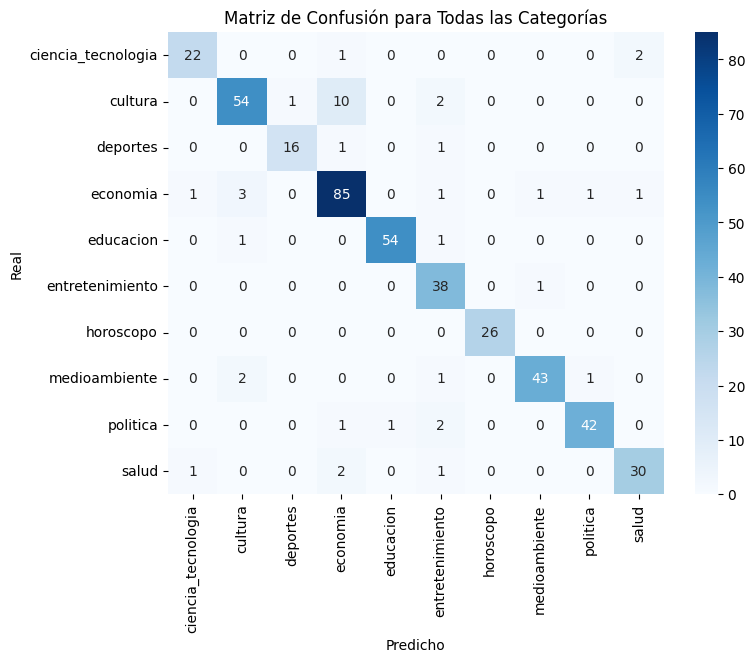

In [19]:
# Mostrar matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión para Todas las Categorías')
plt.show()

*Curva ROC (Receiver Operating Characteristic):*

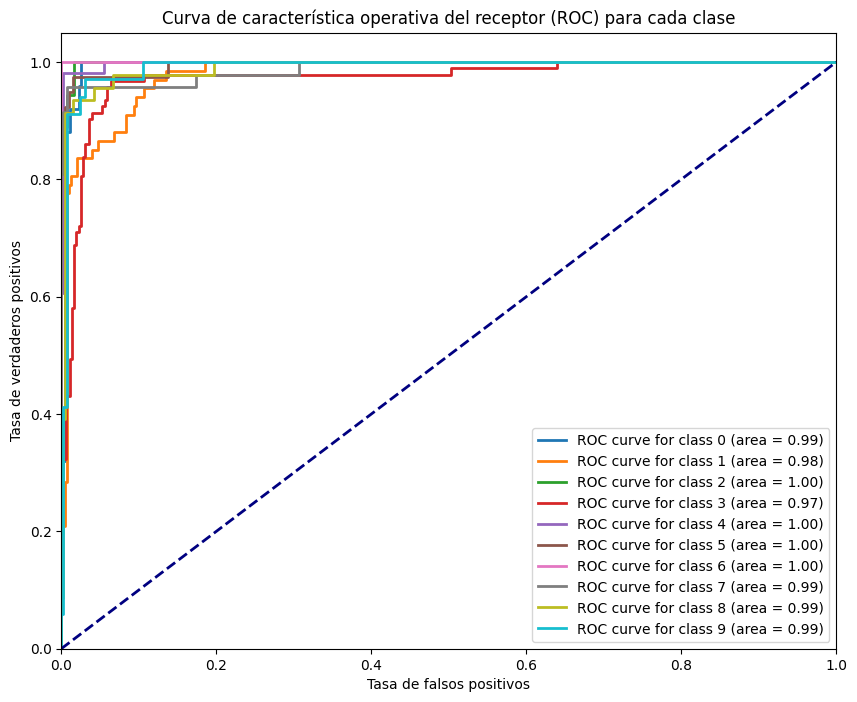

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades en lugar de las predicciones
y_prob = svm_classifier.decision_function(X_test)

# Inicializar la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular la curva ROC para cada clase
for i in range(len(categorias)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Crear el gráfico de la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(categorias)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva de característica operativa del receptor (ROC) para cada clase')
plt.legend(loc="lower right")
plt.show()


*recisión-Recall Curve:*

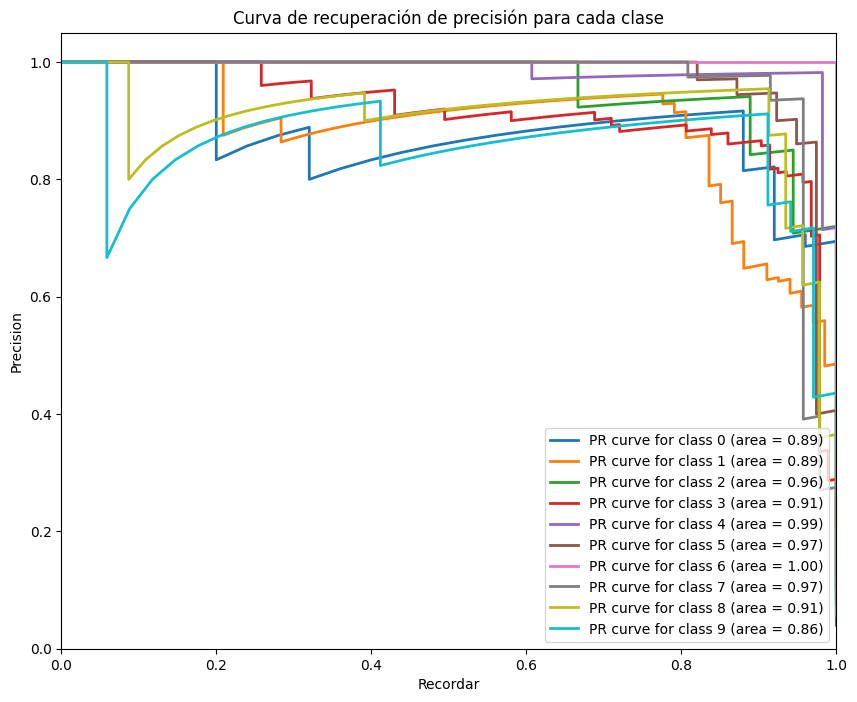

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Obtener las probabilidades en lugar de las predicciones
y_prob = svm_classifier.decision_function(X_test)

# Inicializar la curva de precisión-recall para cada clase
precision = dict()
recall = dict()
average_precision = dict()

# Calcular la curva de precisión-recall para cada clase
for i in range(len(categorias)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_prob[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_prob[:, i])

# Crear el gráfico de la curva de precisión-recall para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(categorias)):
    plt.plot(recall[i], precision[i], lw=2, label=f'PR curve for class {i} (area = {average_precision[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recordar')
plt.ylabel('Precision')
plt.title('Curva de recuperación de precisión para cada clase')
plt.legend(loc="lower right")
plt.show()


*Grafico de barras*

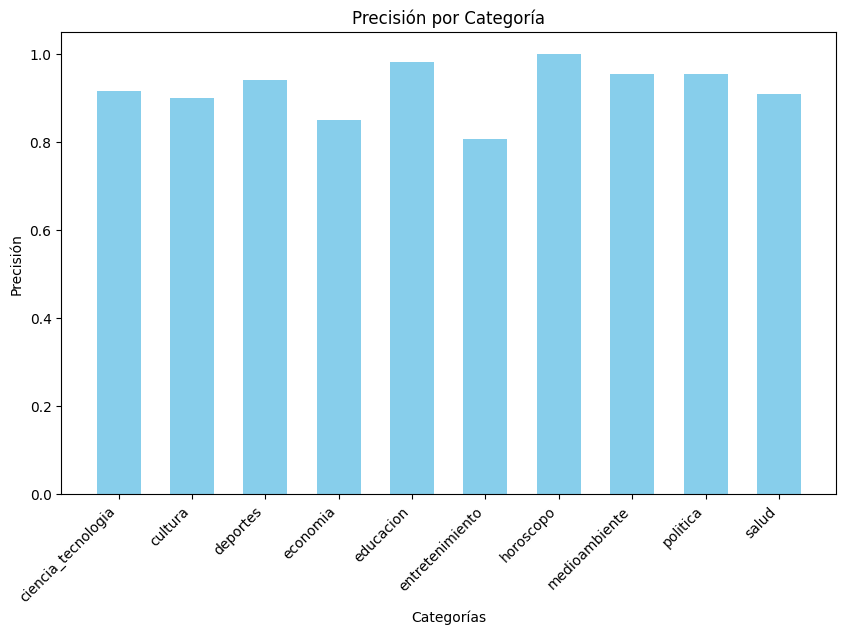

In [22]:
from sklearn.metrics import precision_score
# Calcular la precisión por categoría
precision_scores = precision_score(y_test, y_pred, average=None)
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))
# Crear el gráfico de barras con barras más anchas
plt.bar(categorias, precision_scores, width=0.6, color='skyblue')
# Añadir etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Precisión')
plt.title('Precisión por Categoría')
# Rotar las etiquetas para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.show()


Gráfico de burbujas de precision de clasificación de noticias

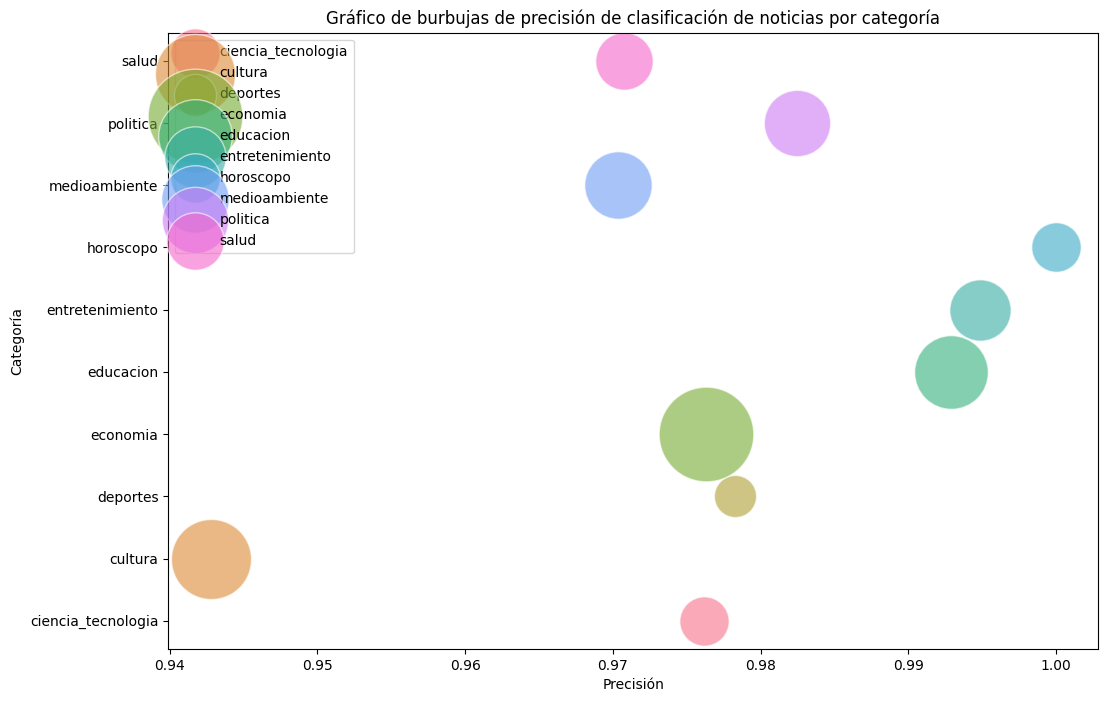

In [25]:
import matplotlib.pyplot as plt

# Crear un diccionario para mapear categorías a colores
categoria_a_color = {cat: color for cat, color in zip(categorias, sns.color_palette("husl", len(categorias)))}

# Crear un gráfico de burbujas para cada categoría
plt.figure(figsize=(12, 8))

for cat in categorias:
    # Filtrar las filas que pertenecen a la categoría específica
    df_categoria = df[df['categoria'] == cat]

    # Vectorizar y reducir dimensionalidad para este conjunto de datos
    X_tfidf_categoria = vectorizer_tfidf.transform(df_categoria['texto_noticia'])
    X_tfidf_svd_categoria = svd.transform(X_tfidf_categoria)

    # Obtener las predicciones del clasificador SVM para esta categoría
    y_pred_categoria = svm_classifier.predict(X_tfidf_svd_categoria)

    # Calcular el tamaño de la burbuja según la precisión de la clasificación
    accuracy = accuracy_score(df_categoria['categoria_num'], y_pred_categoria)
    size = len(df_categoria) * 10  # Ajusta el tamaño según la cantidad de noticias en esa categoría

    # Obtener el color de la burbuja según la categoría
    color = categoria_a_color[cat]

    # Crear la burbuja en el gráfico
    plt.scatter(accuracy, categoria_a_numero[cat], s=size, color=color, alpha=0.6, edgecolors='w', label=cat)

# Invertir el eje y para que las categorías se muestren en el orden correcto
plt.yticks(list(categoria_a_numero.values()), list(categoria_a_numero.keys()))

plt.xlabel('Precisión')
plt.ylabel('Categoría')
plt.title('Gráfico de burbujas de precisión de clasificación de noticias por categoría')
plt.legend()
plt.show()


**Validacion cruzada para mostrar Precisión media y Desviación estándar**
Se usa cross_val_score de scikit-learn la validación cruzada con 5 divisiones.

Resultados de validación cruzada:
Precisión media: 0.88
Desviación estándar: 0.07


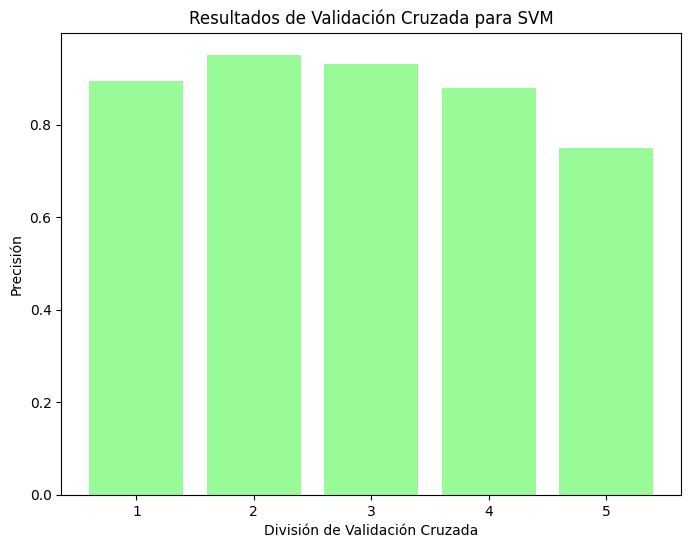

In [27]:
import pandas as pd
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

# Leer el archivo XLSX con el que ya estaba trabajando
df = pd.read_excel('Nuevo.xlsx')

# Lista de categorías
categorias = df['categoria'].unique()

# Crear un diccionario para mapear categorías a números
categoria_a_numero = {cat: num for num, cat in enumerate(categorias)}
# Asignar etiquetas numéricas a las categorías en el DataFrame
df['categoria_num'] = df['categoria'].map(categoria_a_numero)

# Vectorización con reducción de dimensionalidad mediante umbral de frecuencia (TF-IDF)
vectorizer_tfidf = TfidfVectorizer(vocabulary=palabras_mas_frecuentes)
X_tfidf = vectorizer_tfidf.fit_transform(df['texto_noticia'])
palabras_tfidf = vectorizer_tfidf.get_feature_names_out()

# Validación cruzada
svm_classifier = SVC(kernel='linear')
cv_scores = cross_val_score(svm_classifier, X_tfidf, df['categoria_num'], cv=5)

# Mostrar resultados de la validación cruzada
print(f"Resultados de validación cruzada:")
print(f"Precisión media: {cv_scores.mean():.2f}")
print(f"Desviación estándar: {cv_scores.std():.2f}")

# Visualizar resultados de validación cruzada
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color='#98FB98')
plt.xlabel('División de Validación Cruzada')
plt.ylabel('Precisión')
plt.title('Resultados de Validación Cruzada para SVM')
plt.show()
